In [1]:
from midi_utils import get_notes, prepare_sequences, create_midi
import matplotlib.pyplot as plt

In [2]:
from model import MusicVAE
from torch import optim

In [3]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

# Load midi data and EDA

In [4]:
notes = get_notes("midi_songs")
notes

93


['6.9.11.1.2',
 '6.9.11.2',
 '11.2.4.7',
 '1.2.4.6.9',
 '6.9.11.1.2',
 '6.9.11.2',
 '11.2.4.7',
 '1.2.4.6.9',
 '6.9.11.1.2',
 '9.11.0.2.4',
 'E4',
 'G4',
 'E5',
 '11.2.4.6.7',
 'F#4',
 'E5',
 'B4',
 'G5',
 '9.11.0.2.4',
 'E4',
 'G4',
 'E5',
 '11.2.4.6.7',
 'F#4',
 'E5',
 'G5',
 '6.7.11.2',
 'B4',
 'G4',
 'D4',
 '4.5.9.0',
 'D5',
 'G5',
 'G4',
 '6.7.11.2',
 'B4',
 'G4',
 'D4',
 '4.5.9.0',
 'D5',
 'G5',
 'G4',
 '4.5.9.0',
 '9.0.2.5',
 '4.7.11',
 'G5',
 'C6',
 'B4',
 '10.1.5',
 'E-5',
 '5.8.0',
 '5.8.0',
 'F5',
 '10.1.5',
 'F5',
 'B-5',
 '10.1.5',
 'E-5',
 '5.8.0',
 '5.8.0',
 'F5',
 '10.1.5',
 'F5',
 'B-5',
 '4.7.9.0',
 '2.5.7.9',
 '9.11.2.4',
 '7.9.11.2.4',
 '4.7.9.11.0',
 'E4',
 'G4',
 '0.2.4.7',
 'C4',
 'A4',
 '6.9.11.2',
 '4.5.7.9.0',
 '9.0.2.5',
 '11.2.4.7',
 '4.5.9.0',
 '4.5.7.9.0',
 '9.0.2.5',
 '11.2.4.7',
 '4.5.9.0',
 '4.7.11',
 'E5',
 '4.7.9.0',
 '0.4.7',
 'E5',
 '7.9.2',
 'B5',
 'A5',
 'G5',
 '4.7.11',
 'E5',
 '4.7.9.0',
 '0.4.7',
 'E5',
 '7.9.2',
 'B5',
 'A5',
 'G5',
 '10.1.3.6

In [5]:
pitchnames = sorted(set(item for item in notes))
pitchnames

['0.1.3.5.8',
 '0.1.5.8',
 '0.2',
 '0.2.3.5.7',
 '0.2.3.7',
 '0.2.4',
 '0.2.4.7',
 '0.2.4.7.9',
 '0.2.5',
 '0.3',
 '0.3.5',
 '0.3.5.7',
 '0.3.5.7.8',
 '0.3.5.8',
 '0.3.7',
 '0.4',
 '0.4.7',
 '0.5',
 '1',
 '1.2',
 '1.2.4.6.9',
 '1.2.6',
 '1.2.6.9',
 '1.3.4.8',
 '1.3.5',
 '1.3.8',
 '1.4',
 '1.4.6.8.9',
 '1.4.6.9',
 '1.4.8',
 '1.5.8',
 '1.6',
 '1.7',
 '10',
 '10.0',
 '10.0.1.5',
 '10.0.2.5',
 '10.0.2.5.7',
 '10.0.3',
 '10.0.5',
 '10.1',
 '10.1.3.5.6',
 '10.1.3.6',
 '10.1.5',
 '10.11.3.6',
 '10.2',
 '10.2.5',
 '11',
 '11.0',
 '11.0.4.7',
 '11.1',
 '11.1.2.6',
 '11.1.3.6',
 '11.1.4.7',
 '11.2',
 '11.2.4',
 '11.2.4.6.7',
 '11.2.4.7',
 '11.2.6',
 '11.3',
 '11.3.5',
 '11.3.6',
 '11.4',
 '2',
 '2.3.5.7.10',
 '2.3.7',
 '2.3.7.10',
 '2.4',
 '2.4.5.9',
 '2.4.6',
 '2.4.6.7',
 '2.4.7.10',
 '2.4.7.9',
 '2.5',
 '2.5.7',
 '2.5.7.10',
 '2.5.7.9',
 '2.5.7.9.10',
 '2.5.9',
 '2.6',
 '2.6.7',
 '2.6.9',
 '2.7',
 '2.8',
 '3',
 '3.4',
 '3.4.6.8',
 '3.4.8.10.11',
 '3.4.8.11',
 '3.5',
 '3.5.10',
 '3.5.7',
 '3.5.

In [6]:
len(pitchnames)

254

In [7]:
n_vocab = len(set(notes))
n_vocab

254

In [8]:
network_input, idx_to_note = prepare_sequences(notes, pitchnames, n_vocab)

In [9]:
network_input.shape

(1868, 32, 256)

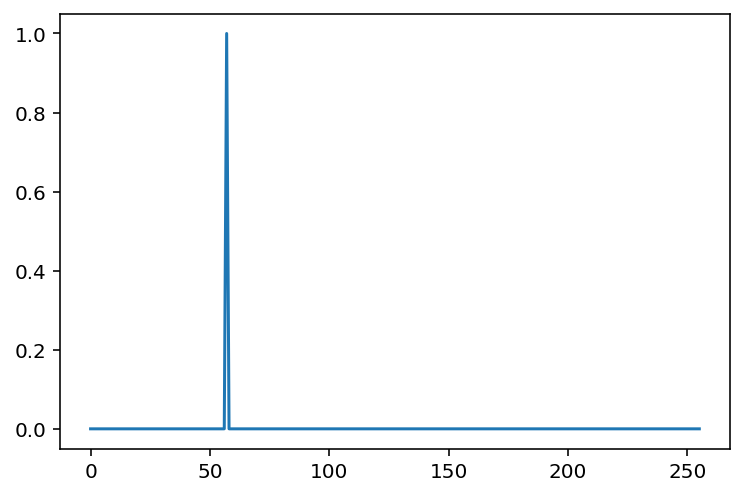

In [10]:
plt.plot(network_input[1, 1, :])

In [11]:
network_input = torch.Tensor(network_input)

# Training

In [12]:
model = MusicVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.9999)

total_loss = []
epochs = 100
batch_size = 256
step_size = len(network_input) // batch_size

for epoch in range(epochs):
    losses = []
    optimizer.zero_grad()
    loss = model.forward(
        network_input.to(device), step_size=step_size, verbose=1
    )
    losses.append(loss)
    loss.backward(retain_graph=True)
    optimizer.step()

    avg_loss = torch.mean(torch.Tensor(losses))
    print(f"Epoch: {epoch}, Loss: {avg_loss}")
    total_loss.append(avg_loss)
    # if avg_loss > torch.mean(torch.Tensor(total_loss[-2:])):
    #     break

c:\Users\leok8\Downloads\Works\Learning-Music-Variational-AutoEncoder\model.py:174: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(out)


Reconstruction loss: 55702.3828125, KL divergence loss: 695.53759765625
Epoch: 0, Loss: 55702.3828125
Reconstruction loss: 55700.12109375, KL divergence loss: 613.6688232421875
Epoch: 1, Loss: 55700.125
Reconstruction loss: 55698.20703125, KL divergence loss: 541.586181640625
Epoch: 2, Loss: 55698.2109375
Reconstruction loss: 55694.84765625, KL divergence loss: 477.5130615234375
Epoch: 3, Loss: 55694.8515625
Reconstruction loss: 55689.50390625, KL divergence loss: 420.73834228515625
Epoch: 4, Loss: 55689.5078125
Reconstruction loss: 55678.00390625, KL divergence loss: 372.29669189453125
Epoch: 5, Loss: 55678.0078125
Reconstruction loss: 55650.58203125, KL divergence loss: 333.10418701171875
Epoch: 6, Loss: 55650.5859375
Reconstruction loss: 55608.1953125, KL divergence loss: 301.1643981933594
Epoch: 7, Loss: 55608.19921875
Reconstruction loss: 55572.69921875, KL divergence loss: 263.199951171875
Epoch: 8, Loss: 55572.703125
Reconstruction loss: 55528.875, KL divergence loss: 225.500427

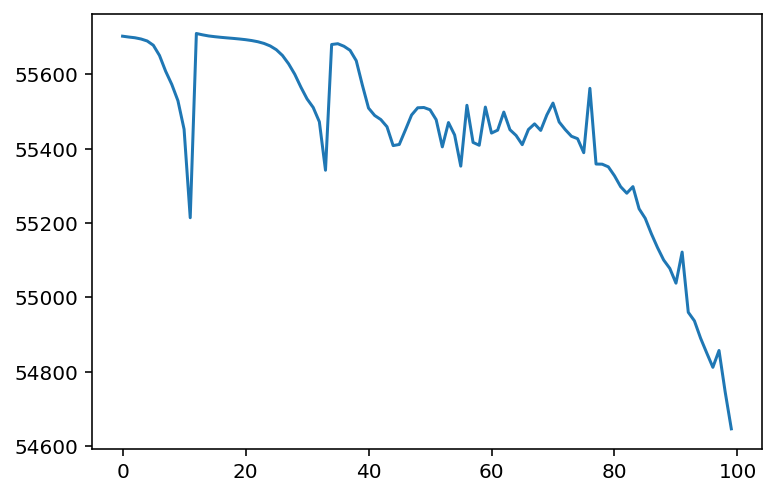

In [19]:
plt.plot(total_loss)

# Sampling

In [20]:
model.initialize_sampler()
sampler = model.sample()

In [21]:
sample = []
for _ in range(512):
    try:
        sample += [idx_to_note[torch.argmax(sampler.sample()).item()]]
    except KeyError:
        print("Out of dictionary.")
        

Out of dictionary.
Out of dictionary.
Out of dictionary.


In [22]:
print(sample)

['9.0.2.4.5', 'B7', '4.7.9.11.0', '2.5.7.9', 'F2', '1.2.4.6.9', '0.4.7', 'E-6', 'G7', '3.4.8.11', '10.0.3', '3.5.10', '8.11', 'C#3', '8.11.1.4', 'G4', '7.11.1', 'C8', '6.9.11.1.2', '11.3.5', '1.6', '5.9.10.0', '3.4.8.11', '6.10.1', '10.0.5', '5.8.10.0.1', 'B2', '1.4.6.8.9', 'G#5', '8.9.1.4', 'B1', '10.11.3.6', '0.1.3.5.8', 'B2', 'B7', '5.9', '3.4.8.11', '6.10.1', '11.3', '3.4.6.8', '6.10', '11.1.3.6', '11.3', 'C#3', '4.9', 'B2', '8.9.1.4', '2.3.5.7.10', 'A4', 'B-6', 'F#3', '7.10.0.2.3', '4.8.9.11', '4.7.9.0', '9.0', '4.8', 'A5', 'A4', '10.0', 'G#6', '10.1', '2.4', '1.2.6.9', '0.2.4.7.9', 'C#6', '0.5', '5.7.9.0.2', '2.5.7', 'B-6', 'D4', 'C2', 'A4', '7.0', '7.10', 'C2', '10.0.2.5', '11.1.3.6', 'B2', 'F#3', '9.0.4', '2.5', '6.9.11.1.2', '3.6.8.11', '1.2', '8.0.3', '9.11.1.4', '10.1.5', '5.8.10.0.1', '2.8', '3.5.7.11', '2.5.7.10', '11.0.4.7', '9.0', 'F3', '0.1.5.8', '7.0', 'G7', 'B2', '5.7.0', '2.5.7', 'G7', '3.5.7.11', 'C5', 'C#5', 'B2', '6.8.10.1.2', '7.11', '3.8', '2.6.9', '3.5.7', 'F1'

In [23]:
output_path = "./sample.mid"

In [24]:
create_midi(sample, output_path=output_path, offset_step=1.0)